# Extracting Vaccination Data, Vaccination sites and number of sesssion data from the api link (Only available from 08-03-2021)

In [110]:
import datetime as datetime
from datetime import timedelta

import requests
import json

import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt

import numpy as np

from sklearn.linear_model import LinearRegression   # Linear regression
from sklearn.preprocessing import PolynomialFeatures  # Polynomial regression
from sklearn.tree import DecisionTreeRegressor  # Decision tree regression


In [111]:

vaccine_data2=[]
vaccine_data_by_age2=[]
vaccine_sites2=[]
vaccine_sessions2=[]

def extract_data(start, end):
    while start<= end:
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    for r in extract_data(datetime.date(2021, 3, 8), datetime.date.today()):
        r=r.json()
        vaccine_data1=r['topBlock']['vaccination'] #08March onwards data is there in the API
        vaccine_data2.append(vaccine_data1) #Storing the vaccine_0date in a list
        vaccine_sites1=r['topBlock']['sites'] #08March onwards data is there in the API
        vaccine_sites2.append(vaccine_sites1) #Storing the vaccine sites data in a list
        vaccine_sessions1=r['topBlock']['sessions'] #08March onwards data is there in the API
        vaccine_sessions2.append(vaccine_sessions1) #Storing the vaccine sessions in a list
        
        

In [114]:
vaccine_data_by_age2=[]

def extract_data(start, end):
    while start <= end:
        yield requests.get('https://api.cowin.gov.in/api/v1/reports/v2/getPublicReports?state_id=&district_id=&date=%s' % start.isoformat())
        start += datetime.timedelta(days=1)

if __name__ == '__main__':
    for r in extract_data(datetime.date(2021, 3, 22), datetime.date.today()):
        r=r.json()
        vaccine_data_by_age1=r['vaccinationByAge'] #Data from 22 March is available
        vaccine_data_by_age2.append(vaccine_data_by_age1)
        

In [115]:
vaccination_by_age1=pd.DataFrame(vaccine_data_by_age2)

In [116]:
vaccination_by_age1

,total,vac_18_25,vac_25_40,vac_40_60,above_60,vac_18_30,vac_30_45,vac_45_60,vac_18_45
0,39612614,1487768.0,7026408.0,11542500.0,19538350,NaN,NaN,NaN,NaN
1,42148875,1517626.0,7139637.0,12235178.0,21238556,NaN,NaN,NaN,NaN
2,44250191,1540577.0,7229462.0,12809134.0,22652955,NaN,NaN,NaN,NaN
3,46454700,1565903.0,7329935.0,13438961.0,24101658,NaN,NaN,NaN,NaN
4,48749313,1593134.0,7437574.0,14142017.0,25558079,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
248,1198843200,NaN,NaN,NaN,192237861,NaN,NaN,310270160.0,696335179.0
249,1206730222,NaN,NaN,NaN,193071405,NaN,NaN,311787697.0,701871120.0
250,1215512379,NaN,NaN,NaN,193988174,NaN,NaN,313448479.0,708075726.0
251,1220251831,NaN,NaN,NaN,194547894,NaN,NaN,314421053.0,711282884.0


In [117]:
vaccination_by_age = vaccination_by_age1[60:]
vaccination_by_age.count()

total        193
vac_18_25      0
vac_25_40      0
vac_40_60      0
above_60     193
vac_18_30      0
vac_30_45      0
vac_45_60    193
vac_18_45    193
dtype: int64

In [118]:
vaccination_by_age_1 = vaccination_by_age.reset_index(drop = True)

In [119]:
vaccination_by_age_1.tail(30)

,total,vac_18_25,vac_25_40,vac_40_60,above_60,vac_18_30,vac_30_45,vac_45_60,vac_18_45
163,1059261872,NaN,NaN,NaN,177557307,NaN,NaN,282892069.0,598812496.0
164,1064617054,NaN,NaN,NaN,178135359,NaN,NaN,283969870.0,602511825.0
165,1069119279,NaN,NaN,NaN,178636130,NaN,NaN,284870496.0,605612653.0
166,1072448536,NaN,NaN,NaN,179009742,NaN,NaN,285543798.0,607894996.0
167,1073201060,NaN,NaN,NaN,179095304,NaN,NaN,285696718.0,608409038.0
168,1075338732,NaN,NaN,NaN,179339883,NaN,NaN,286144569.0,609854280.0
169,1078335980,NaN,NaN,NaN,179671557,NaN,NaN,286755549.0,611908874.0
170,1080898949,NaN,NaN,NaN,179988203,NaN,NaN,287260826.0,613649920.0
171,1086936987,NaN,NaN,NaN,180573662,NaN,NaN,288431177.0,617932148.0
172,1092533900,NaN,NaN,NaN,181127223,NaN,NaN,289519086.0,621887591.0


In [120]:
start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [121]:
vaccine_dataframe1=pd.DataFrame(vaccine_data2) # Converting into a dataframe

In [122]:
#replacing Not-a-Number value to 0

vaccine_dataframe1 = vaccine_dataframe1.replace(np.NaN, 0)
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1203022328,616004977,582564605,273618,1064060938,133661916,8315296,778062350.0,424959978.0,1.203022e+09,...,2596739.0,5718557.0,4064590.0,4248552.0,2153.0,208.0,1120346.0,9000907.0,2495705.0,6505202.0
263,1210909350,619876095,586578382,275745,1071201476,134407183,7292039,780619191.0,430290159.0,1.210909e+09,...,2313771.0,4978268.0,3578066.0,3711992.0,1980.0,178.0,1121563.0,8361865.0,2617472.0,5744393.0
264,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,...,2545863.0,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0
265,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,...,1538016.0,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0


#Creating the dates column to be added to the dataframe 

In [123]:
vaccine_dataframe1.columns

Index(['total', 'male', 'female', 'others', 'covishield', 'covaxin', 'today',
       'tot_dose_1', 'tot_dose_2', 'total_doses', 'vac_18_25', 'vac_25_40',
       'vac_40_60', 'above_60', 'aefi', 'today_dose_one', 'today_dose_two',
       'today_male', 'today_female', 'today_others', 'today_aefi', 'sputnik',
       'yesterday_vac', 'yesterday_dose_one', 'yesterday_dose_two'],
      dtype='object')

In [124]:
#https://pandas.pydata.org/docs/reference/api/pandas.date_range.html
#https://docs.python.org/3/library/datetime.html


start_date = datetime.date(2021, 3, 8)   # start date
end_date = datetime.date.today()    # end date
time_diff=end_date-start_date  
dates_vaccine=pd.date_range(start=start_date.isoformat(),end=end_date,freq='D')

In [125]:
dates_vaccine

DatetimeIndex(['2021-03-08', '2021-03-09', '2021-03-10', '2021-03-11',
               '2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', length=267, freq='D')

In [126]:
type(dates_vaccine)


pandas.core.indexes.datetimes.DatetimeIndex

In [127]:
#Adding the date column
vaccine_dataframe1['dates_vaccine']=dates_vaccine 

In [128]:
vaccine_dataframe1

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,17189856,9403079,7784920,1855,15668064,1520635,1678850,0.0,0.0,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-08
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,1203022328,616004977,582564605,273618,1064060938,133661916,8315296,778062350.0,424959978.0,1.203022e+09,...,5718557.0,4064590.0,4248552.0,2153.0,208.0,1120346.0,9000907.0,2495705.0,6505202.0,2021-11-25
263,1210909350,619876095,586578382,275745,1071201476,134407183,7292039,780619191.0,430290159.0,1.210909e+09,...,4978268.0,3578066.0,3711992.0,1980.0,178.0,1121563.0,8361865.0,2617472.0,5744393.0,2021-11-26
264,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,...,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0,2021-11-27
265,1224430959,626533676,593439192,278963,1083421339,135704911,4155737,785200339.0,439230620.0,1.224431e+09,...,2617721.0,2059670.0,2095118.0,949.0,33.0,1125581.0,8263585.0,2565609.0,5697976.0,2021-11-28


In [129]:
vaccine_dataframe1.insert(0, 'date_index', np.arange(0, len(vaccine_dataframe1)))

In [130]:
#Removing the last row because it has incomplete data

vaccine_dataframe = vaccine_dataframe1[1:-1]

vaccine_dataframe.set_index('date_index')

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
date_index,,,,,,,,,,,,,,,,,,,,,
1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,2.271728e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,2.420431e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,2.470360e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,2.693230e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,2.862047e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1194163114,611669440,578043216,271330,1056057598,132807370,8947578,775238504.0,418924610.0,1.194163e+09,...,6476683.0,4393591.0,4551752.0,2235.0,264.0,1119018.0,7633916.0,2415401.0,5218515.0,2021-11-24
262,1203022328,616004977,582564605,273618,1064060938,133661916,8315296,778062350.0,424959978.0,1.203022e+09,...,5718557.0,4064590.0,4248552.0,2153.0,208.0,1120346.0,9000907.0,2495705.0,6505202.0,2021-11-25
263,1210909350,619876095,586578382,275745,1071201476,134407183,7292039,780619191.0,430290159.0,1.210909e+09,...,4978268.0,3578066.0,3711992.0,1980.0,178.0,1121563.0,8361865.0,2617472.0,5744393.0,2021-11-26


In [131]:
#Storing the resultant dataframe into a csv file.
vaccine_dataframe.to_csv('vaccine_dataframe.csv')
vaccine_dataframe_excel = vaccine_dataframe.to_excel('vaccine_dataframe.xlsx')

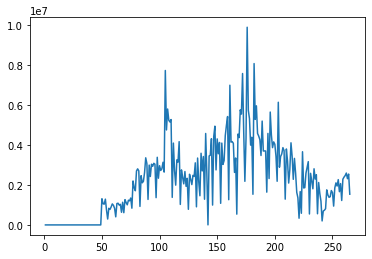

In [132]:
vaccine_dataframe['today_dose_one'].plot()

In [133]:
vaccine_dataframe.columns

Index(['date_index', 'total', 'male', 'female', 'others', 'covishield',
       'covaxin', 'today', 'tot_dose_1', 'tot_dose_2', 'total_doses',
       'vac_18_25', 'vac_25_40', 'vac_40_60', 'above_60', 'aefi',
       'today_dose_one', 'today_dose_two', 'today_male', 'today_female',
       'today_others', 'today_aefi', 'sputnik', 'yesterday_vac',
       'yesterday_dose_one', 'yesterday_dose_two', 'dates_vaccine'],
      dtype='object')

In [134]:
vaccine_dataframe = vaccine_dataframe.replace(np.NaN, 0)
vaccine_dataframe

,date_index,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
1,1,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,4357037.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-09
2,2,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,4665762.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-10
3,3,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,4749612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-11
4,4,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,5160140.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-12
5,5,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,5460862.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021-03-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,261,1194163114,611669440,578043216,271330,1056057598,132807370,8947578,775238504.0,418924610.0,...,6476683.0,4393591.0,4551752.0,2235.0,264.0,1119018.0,7633916.0,2415401.0,5218515.0,2021-11-24
262,262,1203022328,616004977,582564605,273618,1064060938,133661916,8315296,778062350.0,424959978.0,...,5718557.0,4064590.0,4248552.0,2153.0,208.0,1120346.0,9000907.0,2495705.0,6505202.0,2021-11-25
263,263,1210909350,619876095,586578382,275745,1071201476,134407183,7292039,780619191.0,430290159.0,...,4978268.0,3578066.0,3711992.0,1980.0,178.0,1121563.0,8361865.0,2617472.0,5744393.0,2021-11-26
264,264,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,...,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0,2021-11-27


In [135]:
vaccine_dataframe_2 = vaccine_dataframe[72:]



In [136]:
vaccine_dataframe_1 = vaccine_dataframe_2.drop(columns = ['vac_18_25', 'vac_25_40', 'vac_40_60', 'above_60', 'date_index'])

In [137]:

vaccine_dataframe_1.reset_index(drop = True)


,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine
0,146624652,77512357,69091006,21289,167900451,19986188,1418069,146624652.0,41262233.0,1.878869e+08,...,180729.0,818362.0,599345.0,348.0,37.0,0.0,0.0,0.0,0.0,2021-05-20
1,147893976,78248902,69623495,21579,169042095,20301735,1387168,147893976.0,41450129.0,1.893441e+08,...,181533.0,798650.0,588217.0,300.0,46.0,275.0,0.0,0.0,0.0,2021-05-21
2,149302864,79056922,70224054,21888,170345955,20590582,1523798,149302864.0,41633995.0,1.909369e+08,...,176802.0,868995.0,654485.0,318.0,38.0,322.0,0.0,0.0,0.0,2021-05-22
3,150180408,79574984,70583303,22121,171196318,20680782,893707,150180408.0,41697052.0,1.918775e+08,...,56360.0,525862.0,367614.0,231.0,10.0,360.0,0.0,0.0,0.0,2021-05-23
4,152439044,80889623,71526736,22685,173380665,20932868,2375435,152439044.0,41874876.0,1.943139e+08,...,174375.0,1376880.0,997984.0,571.0,39.0,387.0,0.0,0.0,0.0,2021-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1194163114,611669440,578043216,271330,1056057598,132807370,8947578,775238504.0,418924610.0,1.194163e+09,...,6476683.0,4393591.0,4551752.0,2235.0,264.0,1119018.0,7633916.0,2415401.0,5218515.0,2021-11-24
189,1203022328,616004977,582564605,273618,1064060938,133661916,8315296,778062350.0,424959978.0,1.203022e+09,...,5718557.0,4064590.0,4248552.0,2153.0,208.0,1120346.0,9000907.0,2495705.0,6505202.0,2021-11-25
190,1210909350,619876095,586578382,275745,1071201476,134407183,7292039,780619191.0,430290159.0,1.210909e+09,...,4978268.0,3578066.0,3711992.0,1980.0,178.0,1121563.0,8361865.0,2617472.0,5744393.0,2021-11-26
191,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,...,5675919.0,4026901.0,4192851.0,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0,2021-11-27


In [148]:
vaccine_dataframe_1['vac_18_45'] = vaccination_by_age_1['vac_18_45'].values
vaccine_dataframe_1['vac_45_60'] = vaccination_by_age_1['vac_45_60'].values
vaccine_dataframe_1['above_60'] = vaccination_by_age_1['above_60'].values

In [147]:
vaccine_dataframe_1.reset_index(drop = True)

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine,vac_18_45,vac_45_60,above_60
0,146624652,77512357,69091006,21289,167900451,19986188,1418069,146624652.0,41262233.0,1.878869e+08,...,348.0,37.0,0.0,0.0,0.0,0.0,2021-05-20,24815544.0,66109139.0,56936352
1,147893976,78248902,69623495,21579,169042095,20301735,1387168,147893976.0,41450129.0,1.893441e+08,...,300.0,46.0,275.0,0.0,0.0,0.0,2021-05-21,25540064.0,66609184.0,57119494
2,149302864,79056922,70224054,21888,170345955,20590582,1523798,149302864.0,41633995.0,1.909369e+08,...,318.0,38.0,322.0,0.0,0.0,0.0,2021-05-22,26159678.0,66797754.0,57188219
3,150180408,79574984,70583303,22121,171196318,20680782,893707,150180408.0,41697052.0,1.918775e+08,...,231.0,10.0,360.0,0.0,0.0,0.0,2021-05-23,27500303.0,67442972.0,57459394
4,152439044,80889623,71526736,22685,173380665,20932868,2375435,152439044.0,41874876.0,1.943139e+08,...,571.0,39.0,387.0,0.0,0.0,0.0,2021-05-24,28655080.0,68006383.0,57685358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,1194163114,611669440,578043216,271330,1056057598,132807370,8947578,775238504.0,418924610.0,1.194163e+09,...,2235.0,264.0,1119018.0,7633916.0,2415401.0,5218515.0,2021-11-24,696335179.0,310270160.0,192237861
189,1203022328,616004977,582564605,273618,1064060938,133661916,8315296,778062350.0,424959978.0,1.203022e+09,...,2153.0,208.0,1120346.0,9000907.0,2495705.0,6505202.0,2021-11-25,701871120.0,311787697.0,193071405
190,1210909350,619876095,586578382,275745,1071201476,134407183,7292039,780619191.0,430290159.0,1.210909e+09,...,1980.0,178.0,1121563.0,8361865.0,2617472.0,5744393.0,2021-11-26,708075726.0,313448479.0,193988174
191,1219691507,624180895,591053593,277891,1079196575,135191759,8221782,783404282.0,436287225.0,1.219692e+09,...,2030.0,164.0,1124045.0,7333869.0,2334143.0,4999726.0,2021-11-27,711282884.0,314421053.0,194547894


In [152]:
vaccine_dataframe_1[-30:]

,total,male,female,others,covishield,covaxin,today,tot_dose_1,tot_dose_2,total_doses,...,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two,dates_vaccine,vac_18_45,vac_45_60,above_60
236,1061722126,546320552,510984593,237853,936290424,120173829,6761652,733171855.0,328550271.0,1.061722e+09,...,1555.0,124.0,1078745.0,5679851.0,2308903.0,3370948.0,2021-10-30,598812496.0,282892069.0,177557307
237,1063441000,547167044,511856573,238255,937862109,120319218,1263257,733933307.0,329507693.0,1.063441e+09,...,281.0,15.0,1080545.0,6788974.0,2525788.0,4263186.0,2021-10-31,602511825.0,283969870.0,178135359
238,1068796182,549796694,514580851,239509,942765139,120769415,5200984,736128383.0,332667799.0,1.068796e+09,...,1219.0,100.0,1082500.0,1272551.0,563000.0,709551.0,2021-11-01,605612653.0,284870496.0,178636130
239,1073298407,552017547,516861117,240615,946844973,121190208,4082345,737884266.0,335414141.0,1.073298e+09,...,1011.0,116.0,1084098.0,5223620.0,2134279.0,3089341.0,2021-11-02,607894996.0,285543798.0,179009742
240,1076627664,553687411,518519820,241305,949846945,121516085,3065296,739189510.0,337438154.0,1.076628e+09,...,650.0,76.0,1085506.0,4105443.0,1585137.0,2520306.0,2021-11-03,608409038.0,285696718.0,179095304
241,1077380188,554062044,518897565,241451,950537397,121577643,558913,739477582.0,337902606.0,1.077380e+09,...,102.0,15.0,1086020.0,3083397.0,1197824.0,1885573.0,2021-11-04,609854280.0,286144569.0,179339883
242,1079517860,555122433,519974358,241941,952496712,121754589,2053029,740209218.0,339308642.0,1.079518e+09,...,468.0,67.0,1087431.0,563093.0,200716.0,362377.0,2021-11-05,611908874.0,286755549.0,179671557
243,1082515108,556612967,521480423,242590,955202742,122043428,2819641,741012212.0,341502896.0,1.082515e+09,...,614.0,49.0,1089810.0,2066590.0,701841.0,1364749.0,2021-11-06,613649920.0,287260826.0,179988203
244,1085078077,557906804,522748797,243348,957549657,122258436,2354970,741901994.0,343176083.0,1.085078e+09,...,694.0,17.0,1090856.0,2831437.0,740456.0,2090981.0,2021-11-07,617932148.0,288431177.0,180573662
245,1091116115,560933286,525758616,245085,963065430,122778644,5874968,743728094.0,347388021.0,1.091116e+09,...,1531.0,162.0,1092913.0,2373297.0,821608.0,1551689.0,2021-11-08,621887591.0,289519086.0,181127223


In [17]:
first_c = vaccine_dataframe.pop('dates_vaccine')
vaccine_dataframe.insert(1, 'dates_vaccine', first_c)
vaccine_dataframe

#vaccine_dataframe.set_index('date_index')

,date_index,dates_vaccine,total,male,female,others,covishield,covaxin,today,tot_dose_1,...,today_dose_one,today_dose_two,today_male,today_female,today_others,today_aefi,sputnik,yesterday_vac,yesterday_dose_one,yesterday_dose_two
1,1,2021-03-09,18360243,10044921,8313353,1967,16739804,1619279,1162374,14003206.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2021-03-10,19538547,10707385,8829091,2069,17809439,1727948,1175187,14872785.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2021-03-11,19953987,10937930,9013952,2103,18197567,1755220,408379,15204375.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2021-03-12,21772159,11974143,9795767,2247,19860313,1910640,1817351,16612019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,2021-03-13,23159604,12747867,10409393,2342,21148292,2010101,1381753,17698742.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,254,2021-11-17,1144912336,587471588,553002847,258773,1011537914,128087025,7291577,759410871.0,...,1947547.0,5344030.0,3578301.0,3711397.0,1879.0,209.0,1108269.0,6764380.0,2121270.0,4643110.0
255,255,2021-11-18,1152594983,591245601,556909452,260802,1018445574,128860564,7234769,761856639.0,...,2267879.0,4966890.0,3553139.0,3679710.0,1919.0,141.0,1109717.0,7325956.0,1961667.0,5364289.0
256,256,2021-11-19,1158244473,594051627,559751399,262319,1023546598,129407476,5117162,763753900.0,...,1663391.0,3453771.0,2540864.0,2574909.0,1389.0,128.0,1111271.0,7272740.0,2286850.0,4985890.0
257,257,2021-11-20,1165294130,597509123,563341838,264041,1029928682,130072811,6671774,765993722.0,...,2068004.0,4603770.0,3267785.0,3402363.0,1626.0,199.0,1113509.0,5145191.0,1678160.0,3467031.0


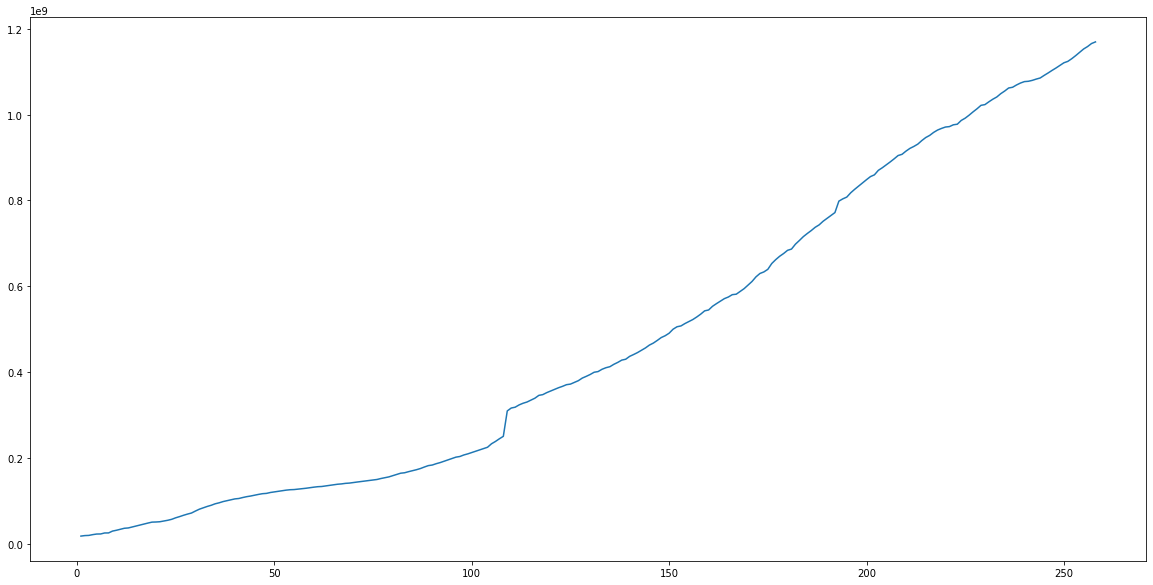

In [18]:
vaccine_dataframe['total'].plot(figsize = (20,10))

In [19]:
X = vaccine_dataframe[['tot_dose_2']]
y = vaccine_dataframe[['date_index']]

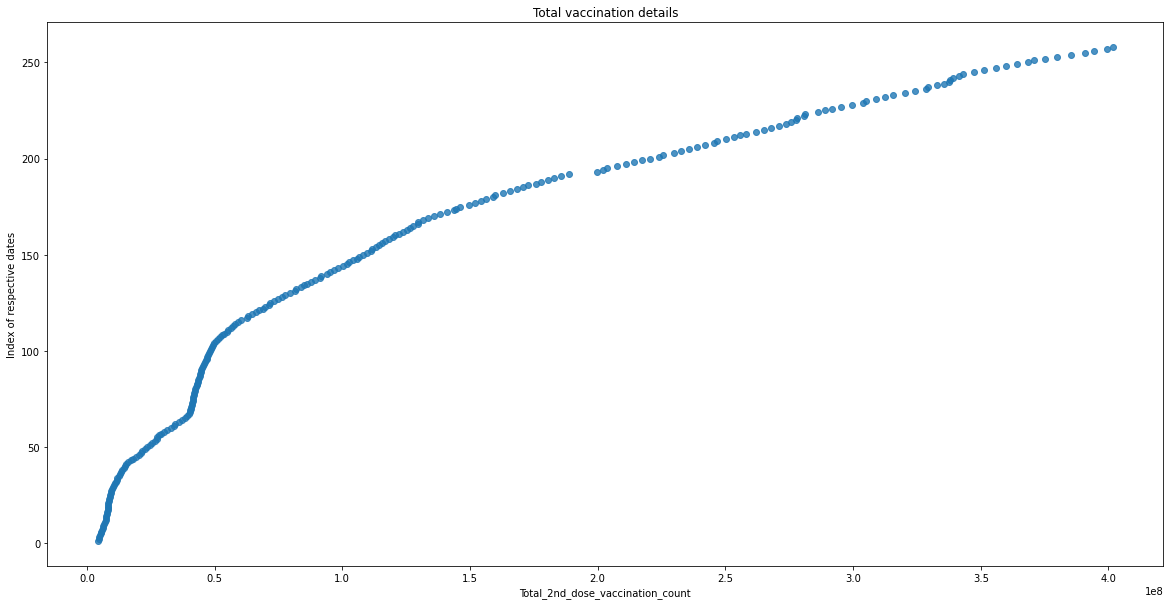

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.8)
plt.title('Total vaccination details')
plt.xlabel('Total_2nd_dose_vaccination_count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [21]:
y.shape


(258, 1)

In [22]:
regression = LinearRegression()
regression.fit(X, y)

LinearRegression()

In [23]:
m = regression.coef_  
m = float(m)
m

6.168239173288906e-07

In [24]:
c = regression.intercept_
c = float(c)
c

53.58281941180475

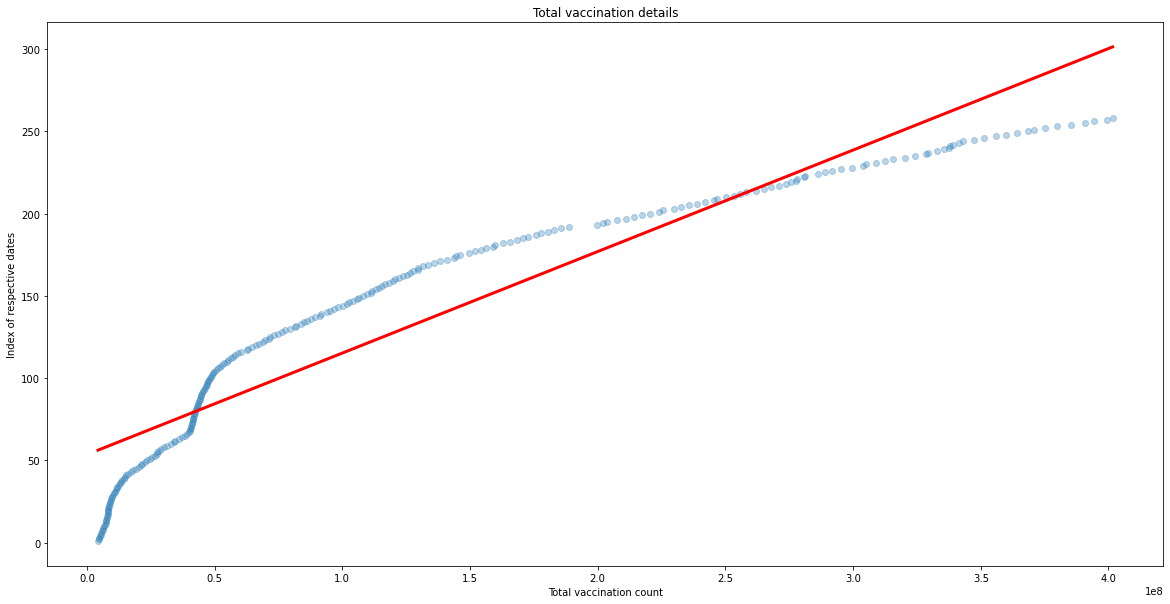

In [25]:
plt.figure(figsize=(20,10))
plt.scatter(X, y, alpha=0.3)

# Adding the regression line here:
plt.plot(X, regression.predict(X), color='red', linewidth=3)


plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
#plt.ylim()
#plt.xlim()
plt.show()

In [26]:
regression.score(X, y)

0.8823364591315727

In [27]:
# mathematical formula for prediction 
# For Linear model:  y = mx + c (y = date_index, x = population of India, m = slop, c = intercept)
# x = 1,402,000,000

In [28]:
x0 = 958174818

In [29]:
y0 = (m*x0) + c

In [30]:
y0

644.6079641364615

In [31]:
# Date for fully vaccination
fully_vaccination_date = start_date + timedelta(y0)
fully_vaccination_date

datetime.date(2022, 12, 12)

In [32]:
# Prediction using polynomial regression

In [33]:
polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(X)
#y_poly = polynomial_features.fit_transform(y)
regression_model = LinearRegression()


regression_model.fit(x_poly, y)
y_pred = regression_model.predict(x_poly)



In [34]:
x_poly[:5]

array([[1.00000000e+00, 4.35703700e+06, 1.89837714e+13],
       [1.00000000e+00, 4.66576200e+06, 2.17693350e+13],
       [1.00000000e+00, 4.74961200e+06, 2.25588142e+13],
       [1.00000000e+00, 5.16014000e+06, 2.66270448e+13],
       [1.00000000e+00, 5.46086200e+06, 2.98210138e+13]])

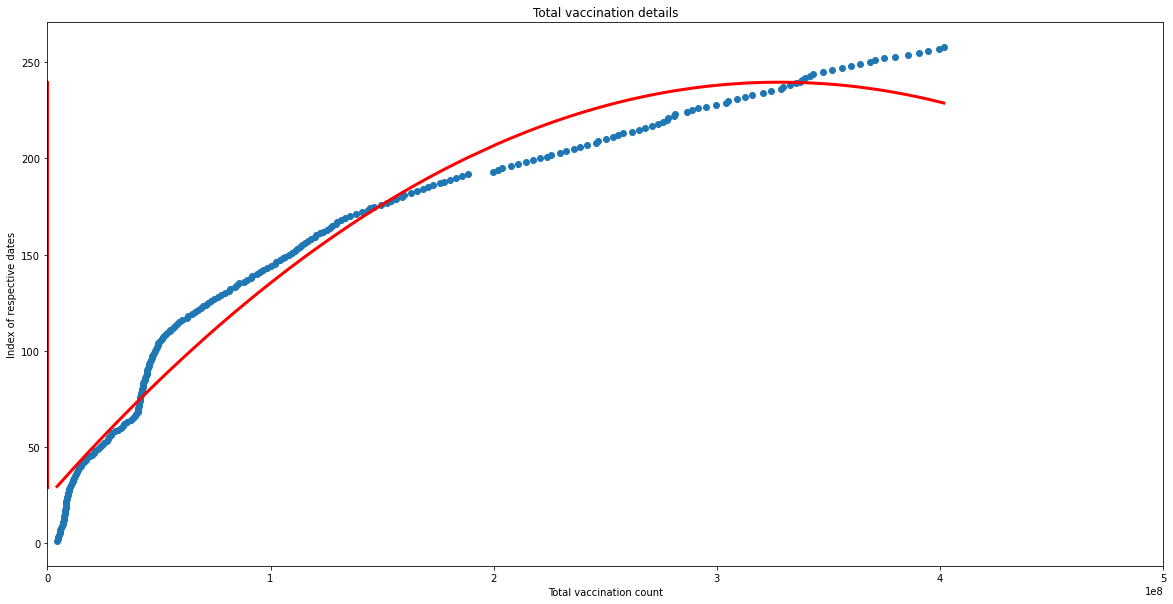

In [35]:
plt.figure(figsize=(20,10))


plt.plot(x_poly, y_pred, color='red', linewidth=3)

plt.title('Total vaccination details')
plt.xlabel('Total vaccination count')
plt.ylabel('Index of respective dates')
plt.xlim()

plt.scatter(X, y, alpha=1)
#plt.ylim()
plt.xlim(0,500000000)
plt.show()

In [36]:
x_prediction_1 = pd.DataFrame([958174818])
x_prediction = polynomial_features.fit_transform(x_prediction_1)
type(x_prediction)

numpy.ndarray

In [37]:
y_pred = regression_model.predict(x_prediction)
y_pred

array([[-556.22993267]])

In [38]:
m1 = regression_model.coef_

In [39]:
c1 = regression_model.intercept_

In [40]:
fully_vaccination_date_poly = start_date + timedelta(int(y_pred))
fully_vaccination_date_poly

datetime.date(2019, 8, 30)

In [41]:
# Decision tree

In [42]:
regression_tree_model = DecisionTreeRegressor(random_state = 0)

In [43]:
regression_tree_model.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [44]:
y_new = regression_tree_model.predict([[668174818]])

In [45]:
y_new

array([258.])

In [46]:
import plotly.express as px